In [1]:
from collections import Counter
import os,re,string,json
from tqdm import tqdm
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import nltk
from matplotlib.dates import date2num
import matplotlib.dates as mdates

from functions import *

plotting.style_()

In [25]:
df = data_loader.load_month('it','2019-10','2020-12')

In [10]:
df = [[d,list(df[df['from'] == d]['speaker_type'])] for d in set(df['from'])]

In [11]:
df = [[d[0],len([x for x in d[1] if x == "notMP"]) / len(d[1])] for d in df]

In [13]:
df = pd.DataFrame(df,columns=['date','p'])

<AxesSubplot:xlabel='date'>

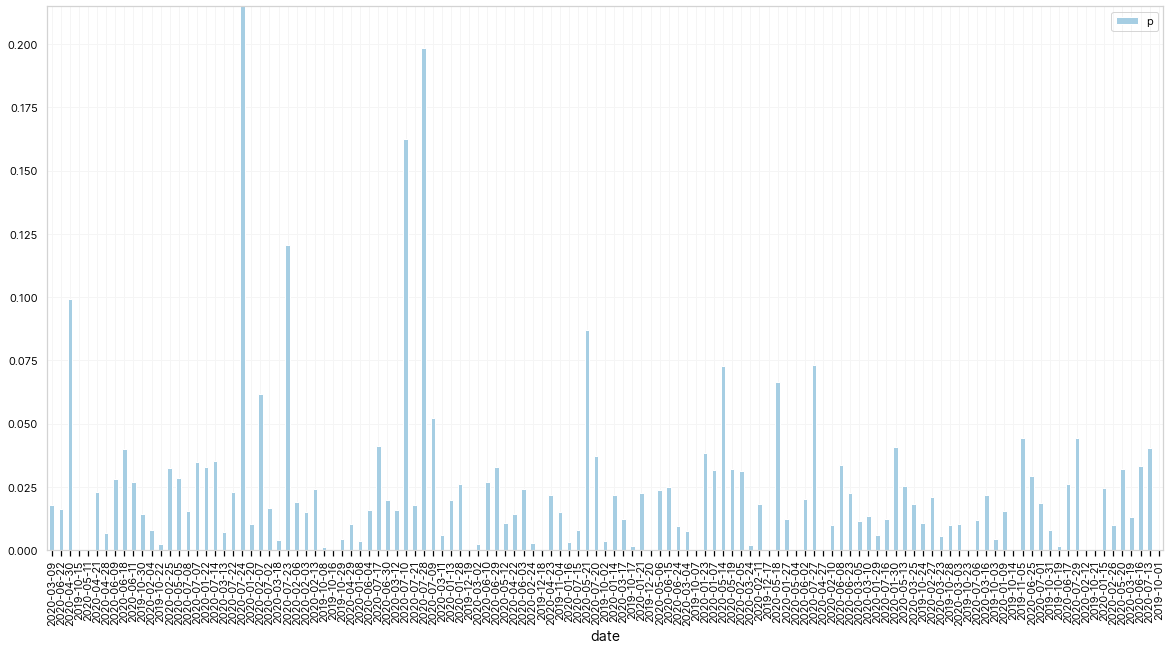

In [16]:
df.plot.bar(x='date',y='p',figsize=(20,10))

In [26]:
set(df[df['speaker_type'] == 'notMP']['speaker_name'])

{'Agea, Laura',
 'Amendola, Vincenzo',
 'Baretta, Pier Paolo',
 'Bonetti, Elena',
 'Conte, Giuseppe',
 'Costa, Sergio',
 'De Cristofaro, Peppe',
 'Guerra, Maria Cecilia',
 'Lamorgese, Luciana',
 'Manfredi, Gaetano',
 'Pisano, Paola',
 'Puglisi, Francesca',
 'Sereni, Marina',
 'Variati, Achille'}

In [24]:
df

,id,text,lemmatized,posner,title,from,to,term,subcorpus,speaker_role,speaker_type,speaker_party,speaker_party_name,party_status,speaker_name,speaker_gender
0,ParlaMint-NL_2019-10-01-tweedekamer-2.u1,Zoals elke dinsdag beginnen we met het mondeli...,zoals elk dinsdag beginnen wij met het mondeli...,zoals_SCONJ_O elk_DET_O dinsdag_PROPN_O beginn...,Report of the meeting of the Dutch Lower House...,2019-10-01,2019-10-01,29-lower,COVID,Chairperson,MP,PvdA,Partij van de Arbeid,-,"Arib, Khadija",F
1,ParlaMint-NL_2019-10-01-tweedekamer-2.u10,Laat ik eerst eens doen wat de geachte collega...,laten ik eerst eens doen wat de geacht collega...,laten_VERB_O ik_PRON_O eerst_ADV_O eens_ADV_O ...,Report of the meeting of the Dutch Lower House...,2019-10-01,2019-10-01,29-lower,COVID,Regular,MP,CDA,Christen-Democratisch Appèl,coalition,"van Dam, Chris",M
2,ParlaMint-NL_2019-10-01-tweedekamer-2.u11,We hebben die Wbni. Voor de kijkers thuis: hij...,wij hebben die Wbni voor de kijker thuis hij h...,wij_PRON_O hebben_VERB_O die_DET_O Wbni_PROPN_...,Report of the meeting of the Dutch Lower House...,2019-10-01,2019-10-01,29-lower,COVID,Regular,MP,CDA,Christen-Democratisch Appèl,coalition,"Grapperhaus, Ferd",M
3,ParlaMint-NL_2019-10-01-tweedekamer-2.u12,De vitale infrastructuur lag wagenwijd open. E...,de vitaal infrastructuur liggen wagenwijd open...,de_DET_O vitaal_ADJ_O infrastructuur_NOUN_O li...,Report of the meeting of the Dutch Lower House...,2019-10-01,2019-10-01,29-lower,COVID,Regular,MP,GL,GroenLinks,opposition,"Özütok, Nevin",F
4,ParlaMint-NL_2019-10-01-tweedekamer-2.u13,De actie is ondernomen. Dat heb ik net beschre...,de actie zijn ondernemen dat hebben ik net bes...,de_DET_O actie_NOUN_O zijn_AUX_O ondernemen_VE...,Report of the meeting of the Dutch Lower House...,2019-10-01,2019-10-01,29-lower,COVID,Regular,MP,CDA,Christen-Democratisch Appèl,coalition,"Grapperhaus, Ferd",M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95321,ParlaMint-NL_2020-11-03-eerstekamer-9.u95,"Als u uw verhaal afmaakt, ga ik daarna naar de...",als u uw verhaal afmaken gaan ik daarna naar d...,als_SCONJ_O u_PRON_O uw_PRON_O verhaal_NOUN_O ...,Report of the meeting of the Dutch Upper House...,2020-11-03,2020-11-03,36-upper,COVID,Chairperson,MP,VVD,Volkspartij voor Vrijheid en Democratie,coalition,"Bruijn, Jan Anthonie",M
95322,ParlaMint-NL_2020-11-03-eerstekamer-9.u96,Tot slot zeg ik even iets over Hongarije en Po...,tot slot zeggen ik even iets over Hongarije en...,tot_ADP_O slot_NOUN_O zeggen_VERB_O ik_PRON_O ...,Report of the meeting of the Dutch Upper House...,2020-11-03,2020-11-03,36-upper,COVID,Regular,MP,CDA,Christen-Democratisch Appèl,coalition,"Knapen, Ben",M
95323,ParlaMint-NL_2020-11-03-eerstekamer-9.u97,"Dank u wel, meneer Knapen.",dank u wel meneer knaap,"dank_VERB_O u_PRON_O wel_ADV_O ,_PUNCT_O menee...",Report of the meeting of the Dutch Upper House...,2020-11-03,2020-11-03,36-upper,COVID,Chairperson,MP,VVD,Volkspartij voor Vrijheid en Democratie,coalition,"Bruijn, Jan Anthonie",M
95324,ParlaMint-NL_2020-11-03-eerstekamer-9.u98,Ik wil even ingaan op het Italiëpunt van de he...,ik willen even ingaan op het Italiëpunt van de...,ik_PRON_O willen_VERB_O even_ADV_O ingaan_VERB...,Report of the meeting of the Dutch Upper House...,2020-11-03,2020-11-03,36-upper,COVID,Regular,MP,FvD,Forum voor Democratie,opposition,"Otten, Henk",M
